<a href="https://colab.research.google.com/github/NamithaAnnesTom/Deep-Learning-Works/blob/main/NeuralNetworks2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Building, Training, and Evaluating a Neural Network for Binary Classification with TensorFlow and Visualization of Training Progress***

***IMPORT LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

NumPy and Pandas: Importing libraries for numerical operations and data manipulation.
train_test_split: From scikit-learn, used to split the dataset into training and testing sets.
StandardScaler: From scikit-learn, used to standardize (normalize) the features.
Matplotlib: For creating plots.
TensorFlow and Keras: Deep learning libraries for building and training neural networks.

***LOADING THE DATASET***

In [ ]:
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


***SEPERATING THE DATASET INTO INPUT AND OUTPUT***

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

***SPLITTING THE DATASET FOR TRAINING AND TESTING***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

train_test_split: This function splits the dataset into training and testing sets. test_size=0.2 means that 20% of the data will be used for testing.

***STANDARDIZATION***

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Feature Standardization: It's common to standardize features (mean=0, variance=1) to facilitate learning in neural networks.

***MODEL CREATION***

In [ ]:
x_train.shape

(820, 13)

In [ ]:
model=keras.Sequential([
    layers.Dense(units=64,activation='relu',input_dim=x_train.shape[1]),
    layers.Dense(units=1,activation='sigmoid')
])

The neural network architecture consists of two layers:

Hidden Layer:

Type: Dense (Fully Connected)
Number of Neurons: 64
Activation Function: ReLU (Rectified Linear Unit)
The purpose of the hidden layer is to capture complex patterns and relationships within the input data. The ReLU activation function is commonly used in hidden layers to introduce non-linearity, allowing the model to learn and represent more complex functions.

Output Layer:

Type: Dense (Fully Connected)
Number of Neurons: 1
Activation Function: Sigmoid
The output layer has 1 neuron because this is a binary classification problem (0 or 1). The sigmoid activation function is used in the output layer for binary classification tasks. It squashes the output values to a range between 0 and 1, representing the probability of the sample belonging to class 1.

Explanation:

The hidden layer with ReLU activation helps the model learn complex patterns in the input data. The ReLU activation sets all negative values to zero and passes positive values as-is.

The output layer with a single neuron and sigmoid activation is common for binary classification. The sigmoid function compresses the output to a range between 0 and 1, and values closer to 1 indicate a higher probability of belonging to class 1.
Now, focusing on input_dim=X_train.shape[1]:

X_train.shape[1]: This extracts the number of features (or input dimensions) in your training data. The shape[1] is accessing the second dimension of the shape, which corresponds to the number of features.
So, input_dim=X_train.shape[1] specifies that the input dimension of the first layer is equal to the number of features in your training data. This is crucial because the neural network needs to know the size of the input it will receive for each sample.

***MODEL COMPILATION***

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

Compilation: Specifying the optimizer, loss function, and metrics for the model. Here, we use the Adam optimizer and binary crossentropy loss for binary classification.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In the above example, the EarlyStopping callback is included in the callbacks parameter of the fit method. The patience parameter is set to 5, meaning that training will stop if the validation loss does not improve for 5 consecutive epochs. The restore_best_weights parameter ensures that the model's weights are restored to the best values when training stops.

You can place the EarlyStopping callback after configuring your model and before training it. It's a good practice to monitor the validation loss for early stopping, as it helps prevent overfitting and ensures that the model generalizes well to new data.

***MODEL TRAINING***

In [ ]:
history=model.fit(x_train, y_train, epochs=100, validation_split=0.1,batch_size=32 ,callbacks=[early_stopping])


Epoch 1/100
24/24 [==============================] - 1s 14ms/step - loss: 0.5655 - accuracy: 0.7195 - val_loss: 0.5547 - val_accuracy: 0.7683
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4422 - accuracy: 0.8360 - val_loss: 0.5072 - val_accuracy: 0.7805
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3808 - accuracy: 0.8618 - val_loss: 0.4841 - val_accuracy: 0.8049
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8618 - val_loss: 0.4762 - val_accuracy: 0.8049
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8659 - val_loss: 0.4727 - val_accuracy: 0.8293
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8808 - val_loss: 0.4706 - val_accuracy: 0.8171
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8794 - val_loss: 0.4810 - val_accuracy: 0.8171
Epoch 8/100


Training: Using the fit method to train the model. We train for 100 epochs with a batch size of 32. validation_split=0.1 means that 10% of the training data is used for validation. But due to EarlyStopping training stops earlier to avoid overfitting.

***MODEL EVALUATION***

In [ ]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(test_loss,test_accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9024
0.22827991843223572 0.9024389982223511


Evaluation: Using the evaluate method to assess the model's performance on the test set.

***PLOTTING TRAINING AND VALIDATION-LOSS AND ACCURACY***

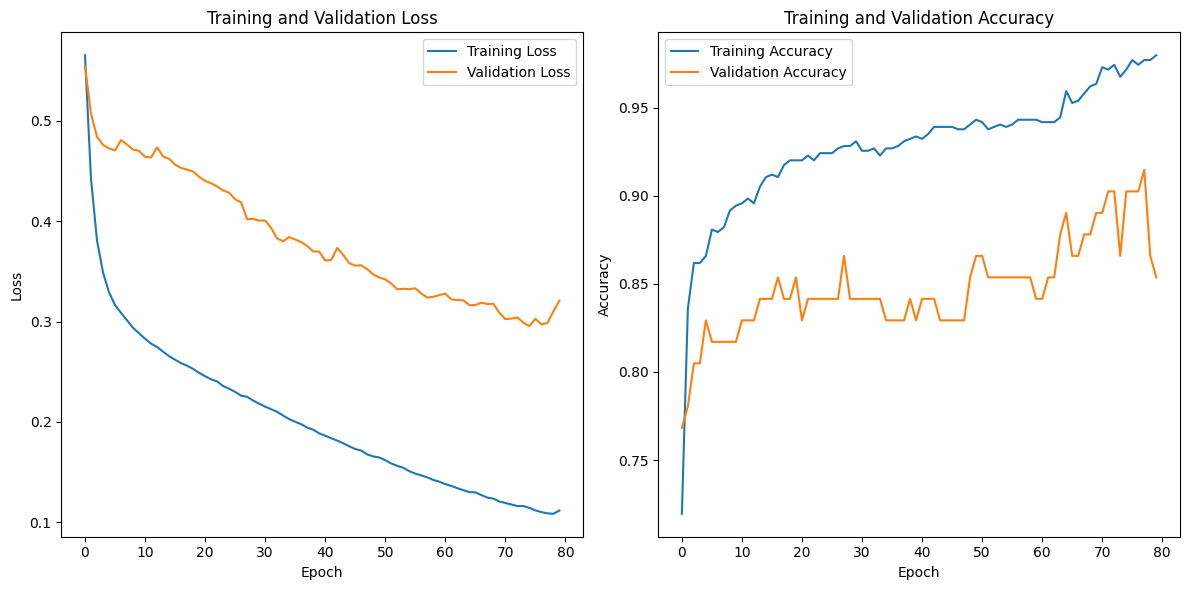

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Plotting: Creating plots to visualize the training and validation loss, as well as training and validation accuracy over epochs.

Plotting loss and accuracy curves during the training of a neural network is a valuable practice to understand how well your model is learning. Here's how you can interpret the information from these plots:

### Loss Curve:

1. **Training Loss:**
   - Represents the error on the training set during each epoch.
   - Ideally, you want to see a decreasing trend over epochs, indicating that the model is learning and improving its performance on the training data.
   - If the training loss is decreasing, it suggests that the model is fitting the training data well.

2. **Validation Loss:**
   - Represents the error on a separate validation set during each epoch.
   - Helps you monitor the generalization performance of the model. A good model should not only fit the training data well but also generalize well to new, unseen data.
   - If the validation loss is decreasing along with the training loss, it suggests that the model is not overfitting and is likely to generalize well.

3. **Comparison:**
   - If the training loss continues to decrease while the validation loss starts increasing or remains constant, it might indicate overfitting. The model is becoming too specialized to the training data and may not generalize well.

### Accuracy Curve:

1. **Training Accuracy:**
   - Represents the classification accuracy on the training set during each epoch.
   - It shows the percentage of correctly classified samples in the training set.
   - An increasing trend indicates that the model is learning to classify the training data more accurately.

2. **Validation Accuracy:**
   - Represents the classification accuracy on the validation set during each epoch.
   - Similar to validation loss, it helps you assess how well the model generalizes to new data.
   - An increasing trend indicates good generalization.

3. **Comparison:**
   - If the training accuracy is high, but the validation accuracy is significantly lower, it might suggest overfitting. The model is memorizing the training data but not performing well on new data.

### Tips:

- **Ideal Scenario:**
  - Decreasing training loss and validation loss.
  - Increasing training accuracy and validation accuracy.
  
- **Overfitting:**
  - If training loss decreases while validation loss increases or remains high, it might indicate overfitting.
  - Consider techniques like regularization, dropout, or using more data to mitigate overfitting.

- **Underfitting:**
  - If both training and validation loss are high and accuracy is low, it might indicate underfitting.
  - Consider increasing model complexity, adding features, or training for more epochs.

By monitoring these curves, you can make informed decisions about the model's performance and take steps to improve it if needed.